<a href="https://colab.research.google.com/github/pranjalguleria/Real_Estate_Prediction/blob/main/HousePricePrediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **REAL ESTATE PRICE PREDICTION - BENGALURU HOUSE PRICE DATASET**

# 1. Importing Necessary Libraries


In Python, there are several libraries commonly used for machine learning prediction projects. These libraries provide various tools and functionalities for data preprocessing, model building, evaluation, and deployment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pickle
import json


*NUMPY* for numerical computing and it offers support for large multidimentional arrays and matrices.

*Pandas* for data analysis and data manipulation, this library is used on data before feeding it to Machine Learning Model.

*Matplotlib/Seaborn* these are libraries used to visualize data, which is imp to compare and evaluate the performance metrics of ML models.

*Scikit-Learn* it provides simple and efficient tools for data mining and data analysis. It includes various algos for classification, regression, clustering, dimentionality reduction, and model selection.

*Pickle and JSON* libraries in Python are commonly used for serialization and deserialization of machine learning models. They allow you to save your trained models to disk in a format that can be easily loaded later for inference or further training.



> %matplotlib inline - when you create a plot using matplotlib in a Jupyter Notebook cell, the resulting plot will be displayed directly below the code cell without the need to call plt.show().



# 2. Reading Data

We will use  ``` # read_csv() ```
function to read the data in csv file.


In [2]:
#use of pandas library (pd) : because data needs to be manipulated, as it is not fit to feed ML model

filepath = 'https://raw.githubusercontent.com/sarwansingh/Python/master/ClassExamples/data/Bengaluru_House_Data.csv'
df = pd.read_csv(filepath)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# 3. Data Preprocessing

**# Checking the total columns and rows in dataframe**

In [108]:
df.shape

(13320, 9)

In [109]:
#Taking the 'area_type' column as a group and counting its values

df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64


groupby( )
This function is used to split the data into groups based on some criteria and,

 agg( )
This function abbreviation of aggregate is used to define what we want to do with the grouped data



In [110]:
#Dropping unwanted columns

data = df.drop(['area_type','balcony','availability','society'], axis='columns')
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [111]:
#Finding total empty vlaues in each column

data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [112]:
data.dropna(subset=['location'],inplace=True)   # there is only 1 value that is null in location : thus dropping it wont affect much

In [113]:
data.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [114]:
# Finding out different values in size column

data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [115]:
#Extracting only numeric values in size column, ignoring str like BHK, Bedrooms etc.

data['bhk'] =data['size'].str.extract('(\d+)')

In [116]:
#data.groupby('size')['size'].agg('count')

data['bhk'].dtype   # - accessing a single column  named 'size' from the dataframe

dtype('O')

This means 'size' column is not in integer datatype yet. we need to covert that column in integer datatype before applying any numeric functions.

In [117]:
data.bhk.dtype  # returns the total number of elements in dataframe

dtype('O')

In [118]:
data['bhk']=data['bhk'].astype(float)

In [119]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


We converted the column elements in float and not in integer datatype because , we still have NAN values yet, and converting to int will raise errors, bacause NaN is a floating point value and does not have an integer representation.

In [120]:
data[data['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27.0
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0


Finding rows with extra-ordinary values !
**(outliers)**

In [121]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [122]:
def is_float(x):

  "Function to convert values into float dtype. "

  try:
    float(x)
  except:
      return False
  return True

In [123]:
# Finding Values which couldnt get converted

data[~data['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4.0
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820,3.0
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0


In [124]:
def convert_sqft_to_sum(x):

  " Function to convert those unusual format of data "

  tokens = x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+ float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None



In [125]:
#Use of function

convert_sqft_to_sum('2100 - 2850')

2475.0

In [126]:
data2 = data.copy()    #Copy function is used to copy the whole dataframe

data2['total_sqft']=data2['total_sqft'].apply(convert_sqft_to_sum)
data2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [127]:
data2.isnull().sum()

location       0
size          16
total_sqft    46
bath          73
price          0
bhk           16
dtype: int64

In [128]:
data2['price_per_sqft'] = data2['price'] * 100000/data2['total_sqft']

# making a new column in the dataframe named `price_per_sqft` and see the logic to create it

data2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [129]:
data2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [130]:
data2.isnull().sum()

location           0
size              16
total_sqft        46
bath              73
price              0
bhk               16
price_per_sqft    46
dtype: int64

In [131]:
data2.location = data2.location.apply(lambda x : x.strip())
# strip is used to remove the white spaces around the data points

location_stats = data2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [132]:
len(location_stats[location_stats<=10])


1053

In [133]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64

In [134]:
data2.location = data2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [135]:
len(data2.location.unique())

242

In [136]:
data2.isnull().sum()

location           0
size              16
total_sqft        46
bath              73
price              0
bhk               16
price_per_sqft    46
dtype: int64

In [137]:
data2[data2.total_sqft / data2.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [138]:
data2.shape

(13319, 7)

In [139]:

data3 = data2[~(data2.total_sqft/data2.bhk<300)]

In [140]:
data3.shape

(12575, 7)

In [141]:
def remove_pps_outliers(df):
    '''
    Function to clear stuff (outliers) in the price_per_sqft column so that
    we don't live in a hypothetical dataset. 😄
    '''
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [142]:
data4 = remove_pps_outliers(data3)
data4.shape

(10300, 7)

In [143]:
data4.isnull().sum()

location           0
size               5
total_sqft         0
bath              56
price              0
bhk                5
price_per_sqft     0
dtype: int64

In [144]:
data4.drop(['size'],axis=1,inplace=True)


In [145]:
data4.dropna(inplace=True)

In [146]:
data4.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [147]:
data4.shape

(10244, 6)

In [148]:
def remove_bhk_outliers(df):
    '''
    Function to clear stuff (outliers) in the bhk column so that we don't live in a hypothetical dataset. 😄
    '''
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data5 = remove_bhk_outliers(data4)
data5.shape

(7328, 6)

In [149]:
data5.drop_duplicates()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668
...,...,...,...,...,...,...
10283,other,1490.0,3.0,140.0,3.0,9395.973154
10285,other,1650.0,1.0,130.0,2.0,7878.787879
10289,other,1155.0,2.0,64.0,2.0,5541.125541
10292,other,1800.0,1.0,200.0,1.0,11111.111111


In [150]:
data6= data5[~(data5.total_sqft/data5.bhk <300)]

In [151]:
data6.shape

(7328, 6)

In [152]:
data6[data6.total_sqft/ data6.bhk < 300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft


In [153]:
#data4.size=pd.to_numeric(data4['size'],errors ='coerce').astype(int)

In [154]:
data6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [155]:
data6.shape

(7328, 6)

In [156]:
data6.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

Finding Outliers and Remove them

# 5. Data Visualization

In [52]:
def plot_scatter_chart(df, location):

  ' Function that will help us to visualize the data of the different locations'

  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price,color='blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='green', label='3 BHK', s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price Per Square Feet')
  plt.title(location)
  plt.legend()

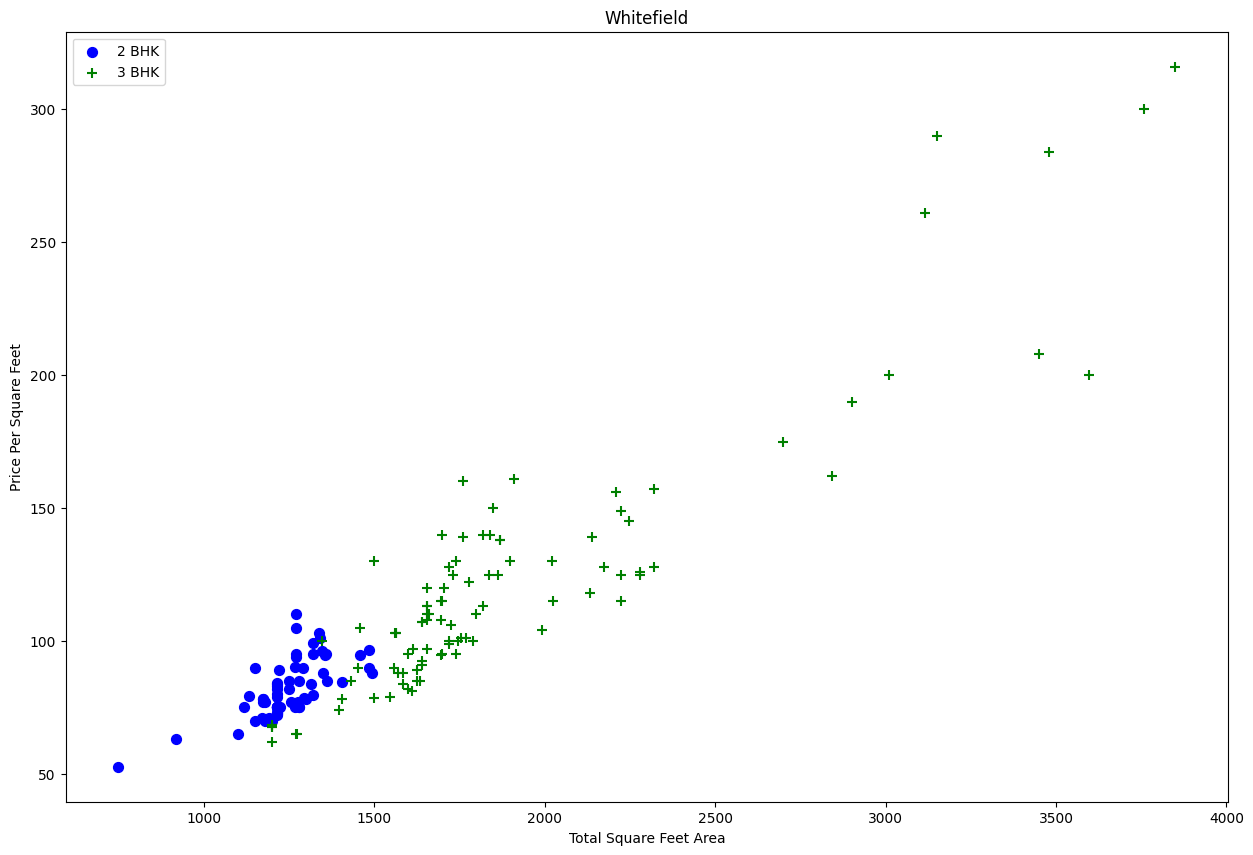

In [53]:
plot_scatter_chart(data6, 'Whitefield')

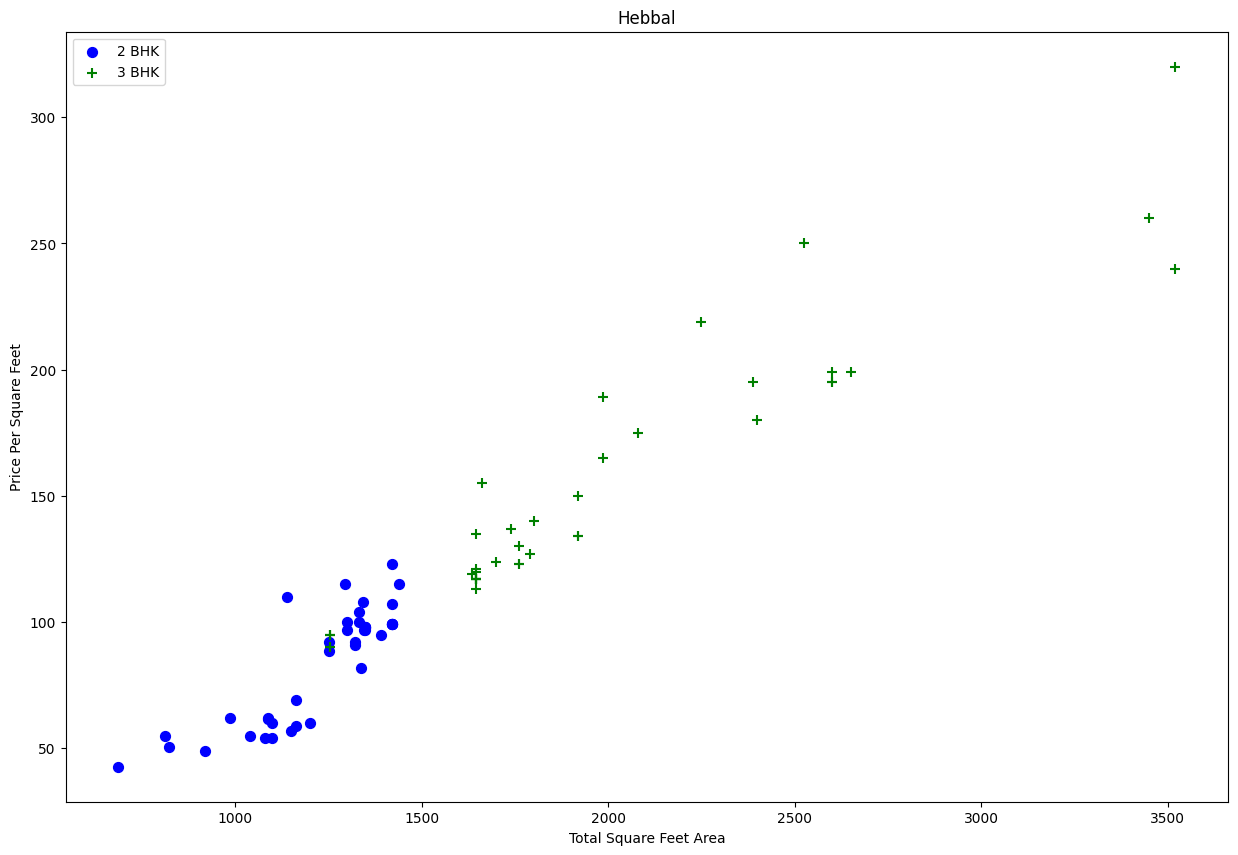

In [54]:
plot_scatter_chart(data6, 'Hebbal')

Text(0, 0.5, 'Count')

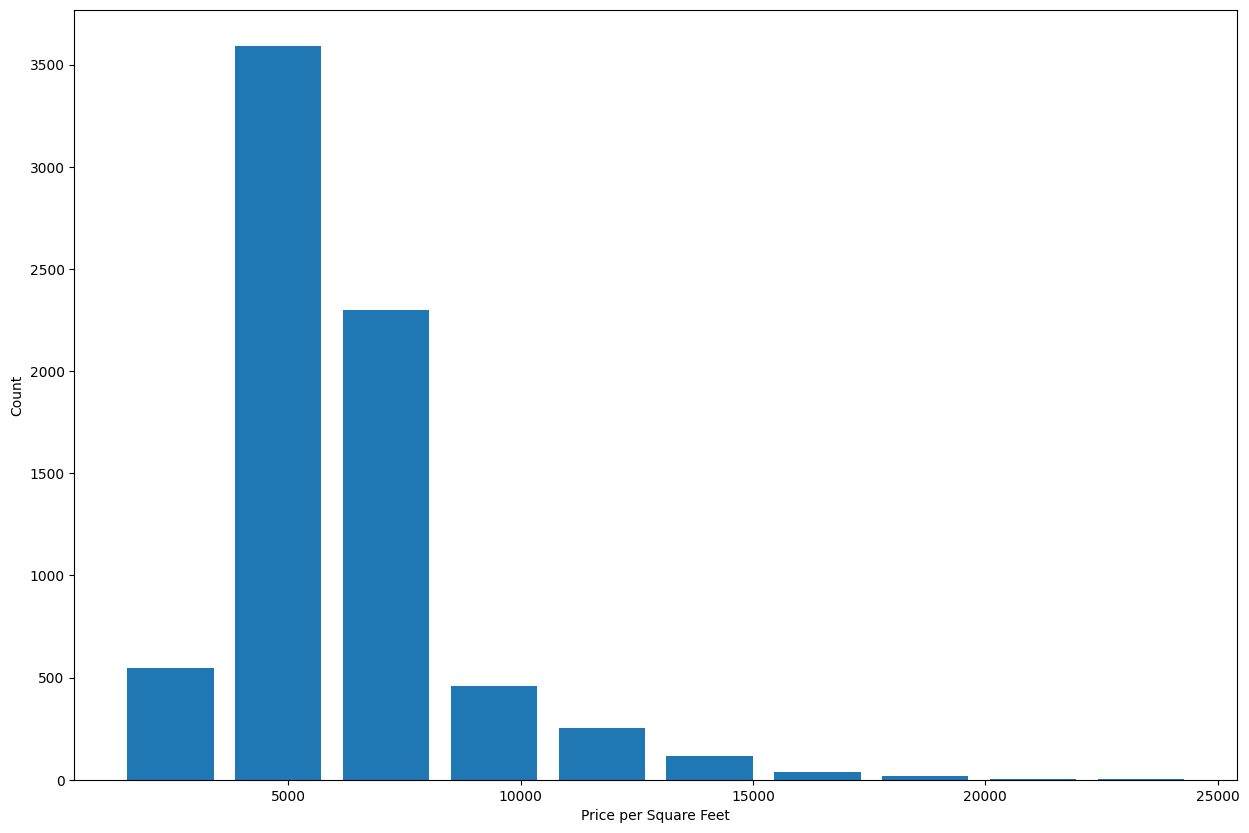

In [55]:
plt.hist(data6.price_per_sqft, rwidth=0.8)    # visualization the price_per_sqft column
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [56]:
data6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [57]:
data6[data6.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5313,Neeladri Nagar,4000.0,12.0,160.0,10.0,4000.000000
8542,other,12000.0,12.0,525.0,10.0,4375.000000
8631,other,10000.0,16.0,550.0,16.0,5500.000000
9364,other,6000.0,12.0,150.0,11.0,2500.000000
9696,other,5425.0,13.0,275.0,13.0,5069.124424


Text(0, 0.5, 'Count')

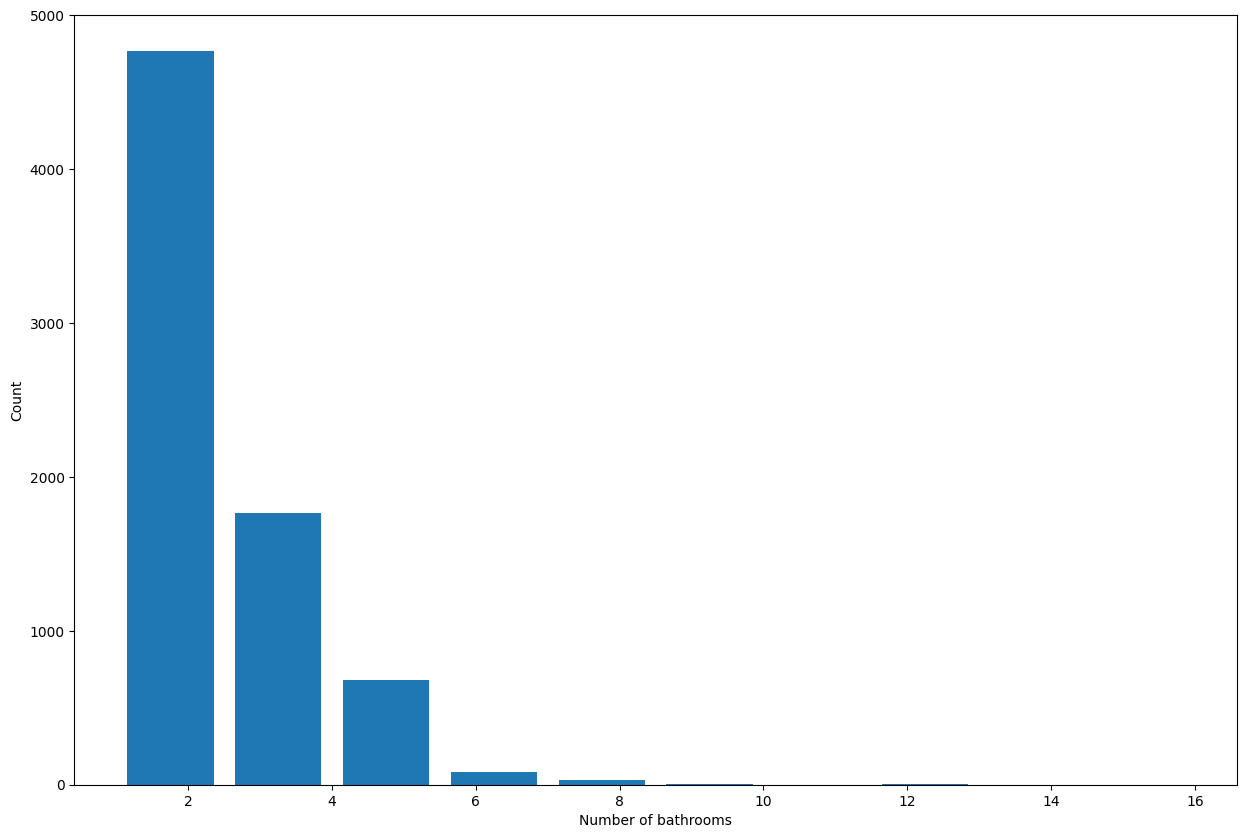

In [58]:
plt.hist(data6.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [59]:
#Bargraph




In [60]:
data6[data6.bath > data6.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
5274,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
6759,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
8467,other,11338.0,9.0,1000.0,6.0,8819.897689


In [61]:
data6.shape

(7328, 6)

In [62]:
data7= data6[~(data6.bath > data6.bhk +2)]

In [63]:
data7.shape

(7324, 6)

In [64]:
# Will drop "price per sqft" column as we do not require it anymoren

data8 = data7.drop(['price_per_sqft'], axis='columns')

In [65]:
data8.sample()

,location,total_sqft,bath,price,bhk
9343,other,5000.0,5.0,600.0,4.0


In [66]:
data8.isnull().agg('sum')

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

# 6. Creating Dummies

TO REPRESENT CATEGORICAL VARIABLE AS NUMERICAL VALUES.
It is used for data manipulation, to make the data easier to understand

In [67]:
dummies = pd.get_dummies(data8.location, dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data9 = pd.concat([data8, dummies.drop('other', axis = 'columns')], axis = 'columns')
data9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
data9.shape

(7324, 246)

In [69]:
# dropping original location as now we have dummies in its place

data10 = data9.drop('location', axis = 'columns')

**Storing Clean Data in CSV file**

In [103]:
data10.to_csv('Bengaluru_House_Clean_Data.csv')

In [72]:
data10.shape

(7324, 245)

In [73]:
data10.isnull().sum()  #Data 10 is after we created dummies

total_sqft             0
bath                   0
price                  0
bhk                    0
1st Block Jayanagar    0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 245, dtype: int64

# 7. Splitting Data for Training and Testing

Before training the model, it is required to split the data into train and test data. For this, we will use sklearn's

```
# train_test_split
```



In [74]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 10299
Columns: 245 entries, total_sqft to Yeshwanthpur
dtypes: float64(4), int64(241)
memory usage: 13.7 MB


In [75]:
data10.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [76]:
X = data10.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X.shape

(7324, 244)

In [78]:
y = data8.price

In [79]:
y.shape  #dependent feature

(7324,)

In [80]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


In [81]:
X_train.shape

(5859, 244)

In [82]:
X_test.shape

(1465, 244)

In [83]:
X_test

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1244,950.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9198,1100.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5026,1525.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8026,1500.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,1600.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,1150.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7806,3600.0,6.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9197,1333.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9262,1293.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
y_test.shape

(1465,)

In [85]:
print('Total data : ', data8.shape)
print('Training data : ', X_train.shape )
print('Testing data : ', X_test.shape)

Total data :  (7324, 5)
Training data :  (5859, 244)
Testing data :  (1465, 244)


# 8. Training the Models

In [86]:
lr_clf = LinearRegression()     # first trying training with LinearRegression
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)


0.8163455042981707

In [87]:
cv = ShuffleSplit(n_splits = 6, test_size = 0.2, random_state = 0)     # ShuffleSplit is just a another type of splitting data
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80911882, 0.83496656, 0.79978254, 0.85141734, 0.83457918,
       0.86668314])

In [88]:
def find_best_model_using_gridsearchcv(X,y):
    '''
    Function to try different models at once of the data with different parameters to find the best ones.
    '''
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha' : [1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)     # GridSearchCV is the main focus as it helps to try out the different parameters for the different models.
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])     # At last binding the results of the models with best params. into a DataFrame.


# 9. Prediction Time

In [89]:
def predictprice(location,sqft,bath,bhk):
    '''
    Function which helps to actually predict the prices.
    '''
    loc_index = np.where(X.columns==location)[0][0]     # np.where() function returns the indices of elements in an input array where the given condition is satisfied.

    x = np.zeros(len(X.columns))    # np.zeros() function returns a new array of given shape and type, with zeros.
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [90]:
#def predictprice(location,sqft,bath,bhk):

predictprice ('Kothanur', 1400, 3, 3).round(3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.669

In [91]:
# def predictprice(location,sqft,bath,bhk):

print(predictprice('Vijayanagar', 1800, 2, 2).round(3),'Lakhs')

132.287 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
#def predictprice(location,sqft,bath,bhk):

print(predictprice('1st Block Jayanagar',1284, 2, 2 ).round(3),'Lakhs')

227.018 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
#def predictprice(location,sqft,bath,bhk):

print(predictprice('Kothanur', 1200, 3, 3).round(3),'Lakhs')

56.841 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [94]:
# def predictprice(location,sqft,bath,bhk):

predictprice('Murugeshpalya', 1500, 2, 6).round(3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.265

# 10. Saving Model

For saving the model, we will be using ``` pickle  ``` and ```json``` module for saving the locations' names.





In [95]:
with open('BHP_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Making a new file with the name "BHP_model.pickle" and dump the "lr_clf" model in that file

In [96]:
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

# 11. Loading Model

In [97]:
#Load the saved model file and use for prediction
file_path = '/content/BHP_model.pickle'

with open(file_path, 'rb') as f:
    loadmodel = pickle.load(f)


In [98]:
def predictprice(location,sqft,bath,bhk):
    '''
    Function which helps to actually predict the prices.
    '''
    loc_index = np.where(X.columns==location)[0][0]     # np.where() function returns the indices of elements in an input array where the given condition is satisfied.
    print (loc_index)
    x = np.zeros(len(X.columns))    # np.zeros() function returns a new array of given shape and type, with zeros.
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return loadmodel.predict([x])[0]

In [99]:
def pprice( sqft,bath,bhk):
    '''
    Function which helps to actually predict the prices.
    '''
    loc_index = 154     # np.where() function returns the indices of elements in an input array where the given condition is satisfied.

    x = np.zeros(len(X.columns))    # np.zeros() function returns a new array of given shape and type, with zeros.
    print( len(X.columns) )
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return loadmodel.predict([x])[0]

In [100]:
print(pprice( 1000, 2, 3).round(3),'Lakhs')

244
35.893 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [101]:
print(predictprice('Kothanur', 1000, 2, 3).round(3),'Lakhs')

154
35.893 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
predictprice('Kothanur', 1500, 3, 3).round(3)

154


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.083